<a href="https://colab.research.google.com/github/Ishita1026/Ishita1026/blob/main/titanic_dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set plot style for better aesthetics

sns.set(style='whitegrid')

!git clone 'https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset'



Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 4.73 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [3]:
# load the titanic dataset from the url
titanic_df=pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/Titanic-Dataset.csv')

# display first five rows
print('first five rows of the dataset:')
titanic_df.head()

first five rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('last five rows of the dataset:')
titanic_df.tail()

last five rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#get concise summary of the dataframe
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_df.shape

(891, 12)

In [9]:
# get the descrptive analysis of the dataset
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# interpretation of describe
# survived 38% survived the shipwrreck
# age min age of 5month to maximum of 80 years and an average age of 30 years were on board
#fare presence of 512 means that there are outliers

In [10]:
titanic_df['Cabin']

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
...,...
886,NaN
887,B42
888,NaN
889,C148


In [11]:
# fidning out the missing values in each column( count /total )
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
#handling the missing values starting with age column by replacing null with the median value of age
median_age=titanic_df['Age'].median()
titanic_df['Age']=titanic_df['Age'].fillna(median_age)

# verify after this whether null values have been cleaned from age
print(titanic_df[['Age']].isnull().sum())


Age    0
dtype: int64


In [18]:
# finding the missing values in embarked column and replacing with mode beacusse it is a categorical coulmn
mode_embarked=titanic_df['Embarked'].mode()[0]
print(mode_embarked)

S


In [22]:
titanic_df['Embarked']=titanic_df['Embarked'].fillna(mode_embarked)
print(titanic_df[['Embarked']].isna().sum())

Embarked    0
dtype: int64


In [28]:
#handling the mssing values in the cabin column having too many missing values so create a new column with booleans values Has_cabin
titanic_df['Has_cabin']=titanic_df ['Cabin'].notna().astype(int)
titanic_df.drop ('Cabin',axis=1,inplace=True)

KeyError: 'Cabin'

In [35]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


KeyError: 'Has_Cabin'

In [36]:
titanic_df['Has_cabin'].value_counts()

,count
Has_cabin,
0,687
1,204


In [37]:
print('Missing values after cleaning:')
titanic_df.isnull().sum()

Missing values after cleaning:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


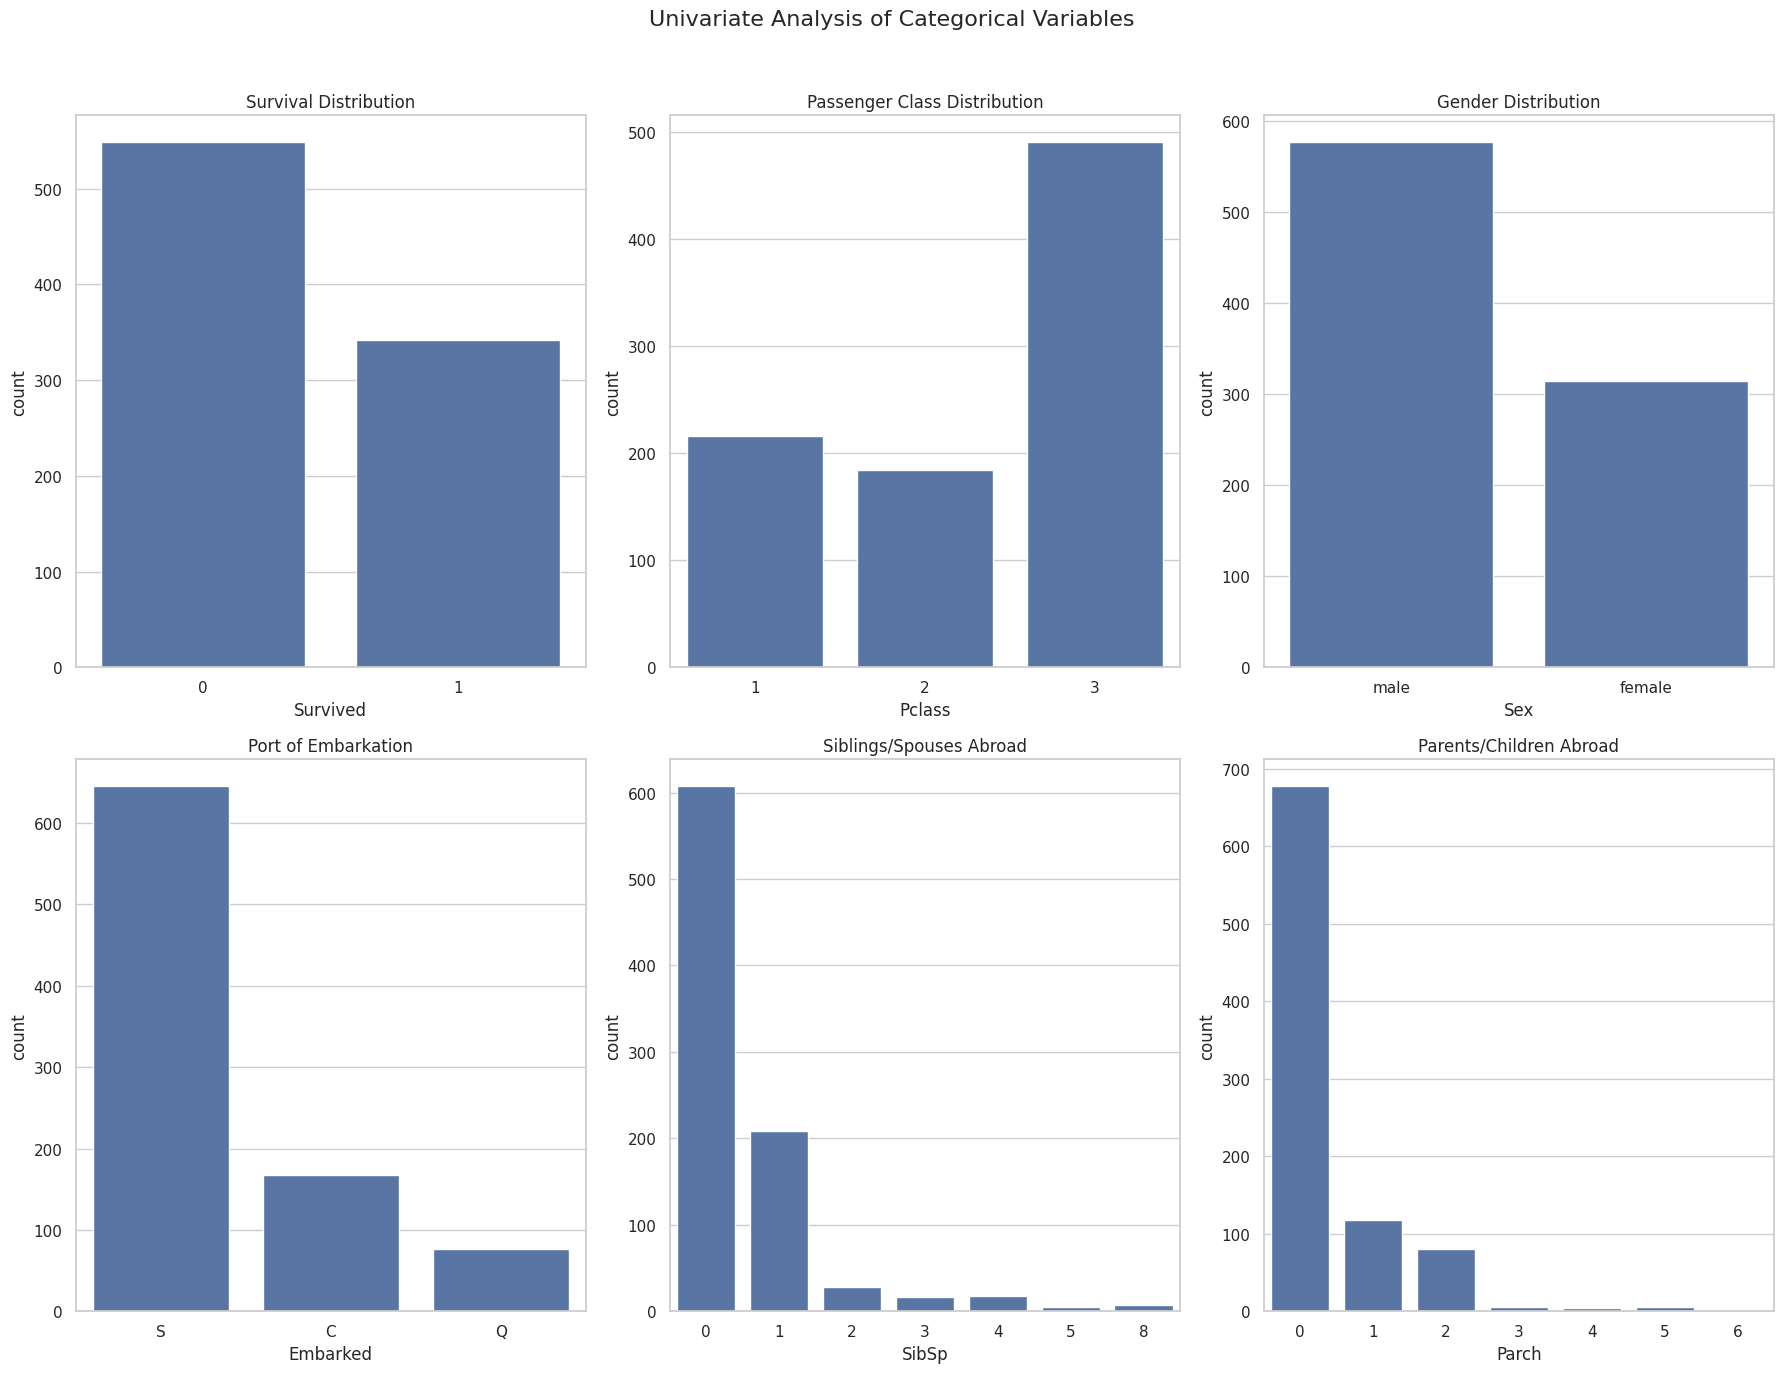

In [47]:
# Univariate analysis of each and every single variable categorical is different than numerical value
# set up figure for plotting
fig,axes=plt.subplots(2,3, figsize=(18,14))
fig.suptitle('Univariate Analysis of Categorical Variables', fontsize=16)

#plotting each categorical variable
sns.countplot(ax=axes[0,0], x='Survived',data=titanic_df).set_title('Survival Distribution')
sns.countplot(ax=axes[0,1], x='Pclass',data=titanic_df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0,2], x='Sex',data=titanic_df).set_title('Gender Distribution')
sns.countplot(ax=axes[1,0], x='Embarked',data=titanic_df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1,1], x='SibSp',data=titanic_df).set_title('Siblings/Spouses Abroad')
sns.countplot(ax=axes[1,2], x='Parch',data=titanic_df).set_title('Parents/Children Abroad')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

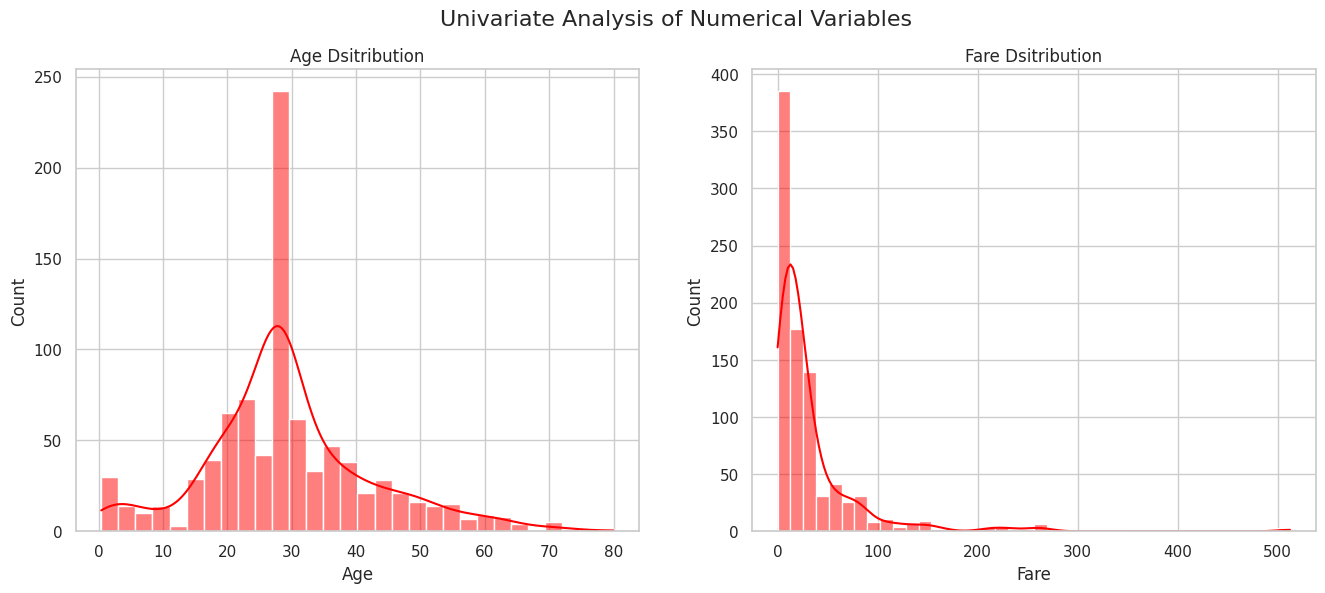

In [49]:
# plotting of the numerical variables
fig,axes=plt.subplots(1,2, figsize=(16,6))
fig.suptitle('Univariate Analysis of Numerical Variables', fontsize=16)

#plotting of the Age distribution
sns.histplot(ax=axes[0], data=titanic_df, x='Age',kde=True, bins=30,color='red').set_title('Age Dsitribution')

#plotting the Fare Distribution
sns.histplot(ax=axes[1], data=titanic_df, x='Fare',kde=True, bins=40,color='red').set_title('Fare Dsitribution')

plt.show()



Bivariate Analyis: Feature vs survival


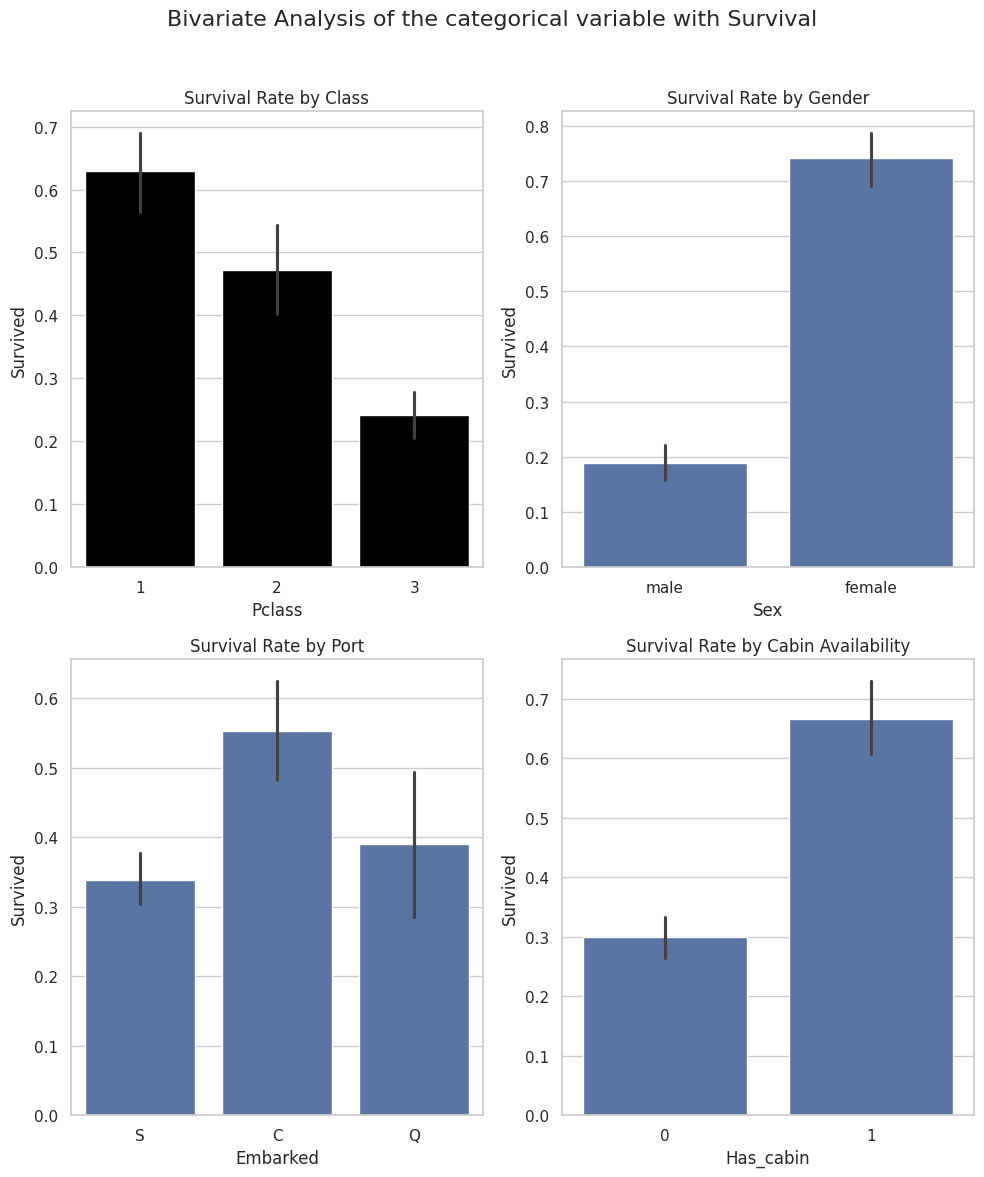

In [54]:
#bivariate analysis categorical vs numerical( barplots),categorical vs catergorical ( stacked barplots), numerical vs numerical(scatterplots)

print('Bivariate Analyis: Feature vs survival')
fig,axes=plt.subplots(2,2, figsize=(10,12))
fig.suptitle('Bivariate Analysis of the categorical variable with Survival', fontsize=16)

sns.barplot(ax=axes[0,0] , x='Pclass', y='Survived',color='black', data=titanic_df).set_title('Survival Rate by Class')
sns.barplot(ax=axes[0,1] , x='Sex', y='Survived', data=titanic_df).set_title('Survival Rate by Gender')
sns.barplot(ax=axes[1,0] , x='Embarked', y='Survived', data=titanic_df).set_title('Survival Rate by Port')
sns.barplot(ax=axes[1,1] , x='Has_cabin', y='Survived', data=titanic_df).set_title('Survival Rate by Cabin Availability')
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()



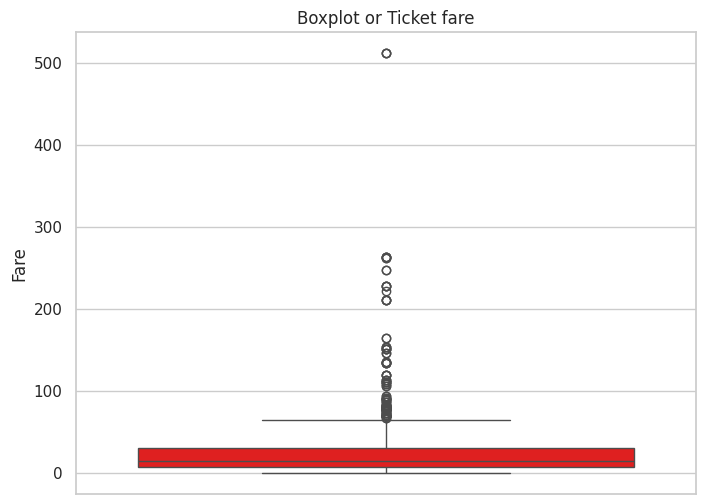

In [57]:
# outlier analysis for Fare boxplot iQR

plt.figure(figsize=(8,6))
sns.boxplot(y='Fare', data=titanic_df,color='red')
plt.title('Boxplot or Ticket fare')
plt.ylabel('Fare')
plt.show()


In [59]:
#feature engineering  combining features familysize= SibSp and Parch

# creating a familysize feature

titanic_df['FamilySize']= titanic_df['SibSp']+titanic_df['Parch'] + 1
# Creating IsAlone feature
titanic_df['IsAlone']=0
titanic_df.loc[titanic_df['FamilySize']==1 , 'IsAlone']=1

titanic_df[['FamilySize','IsAlone']].head()

,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


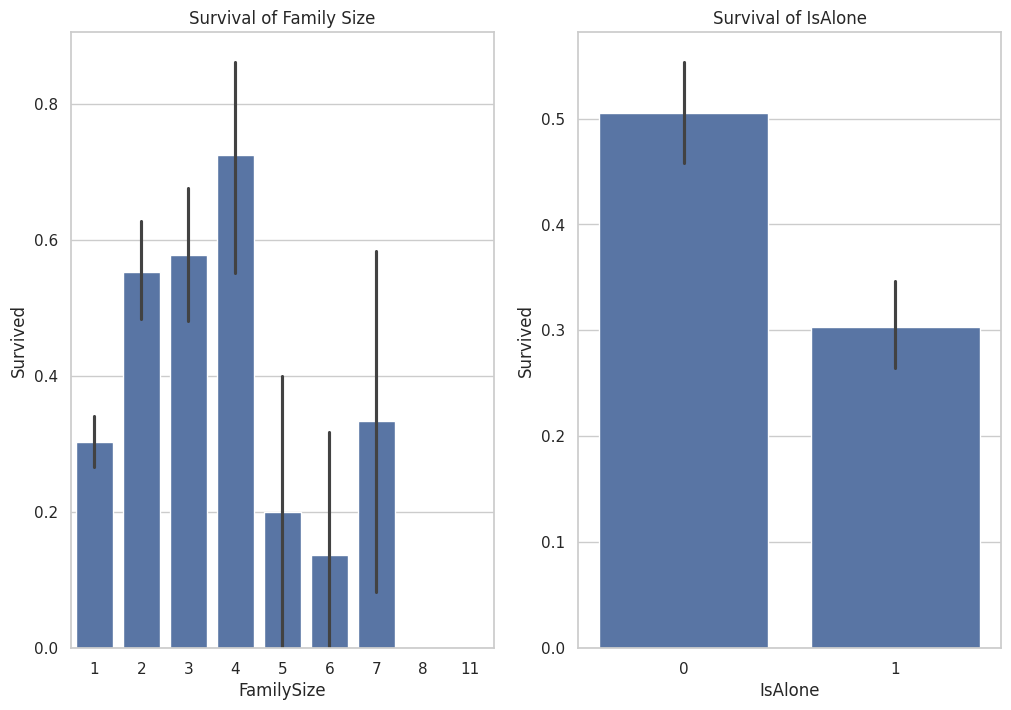

In [61]:
# Survival rate by family size and isalone
fig,axes=plt.subplots(1,2, figsize=(12,8))
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=titanic_df). set_title('Survival of Family Size')
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=titanic_df). set_title('Survival of IsAlone')
plt.show()



In [63]:
# Extracting titles from  the names

titanic_df['title']=titanic_df['Name'].str.extract(r'([A-Za-z]+)\.',expand=True)
titanic_df['title'].value_counts()

,count
title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


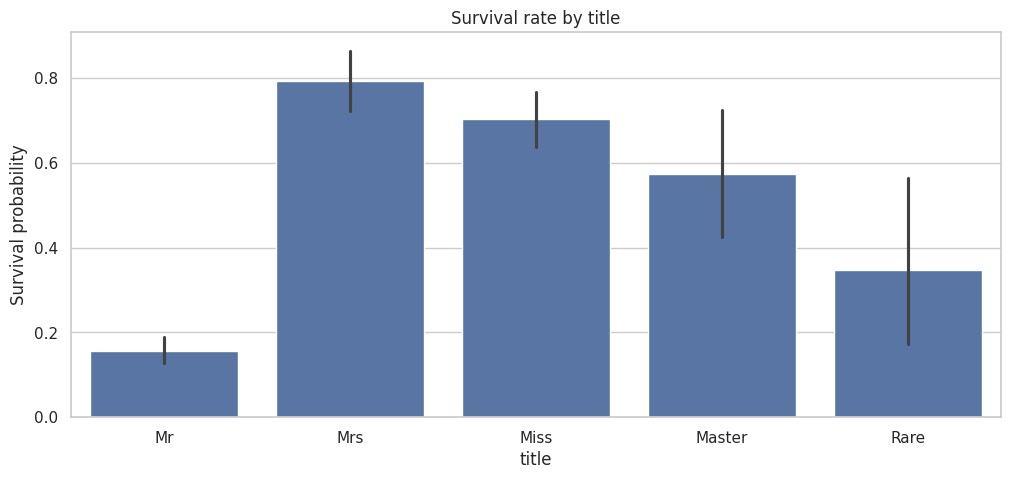

In [69]:
titanic_df['title']=titanic_df['title'].replace(['Don','Lady','Sir','Capt','Countess','Jonkheer','Dona', 'Rev','Col','Dr','Major'],'Rare')

titanic_df['title']=titanic_df['title'].replace('Mlle','Miss')
titanic_df['title']=titanic_df['title'].replace('Ms','Miss')
titanic_df['title']=titanic_df['title'].replace('Mme','Mrs')

plt.figure(figsize=(12,5))
sns.barplot(x='title',y='Survived',data=titanic_df)
plt.title('Survival rate by title')
plt.ylabel('Survival probability')
plt.show()

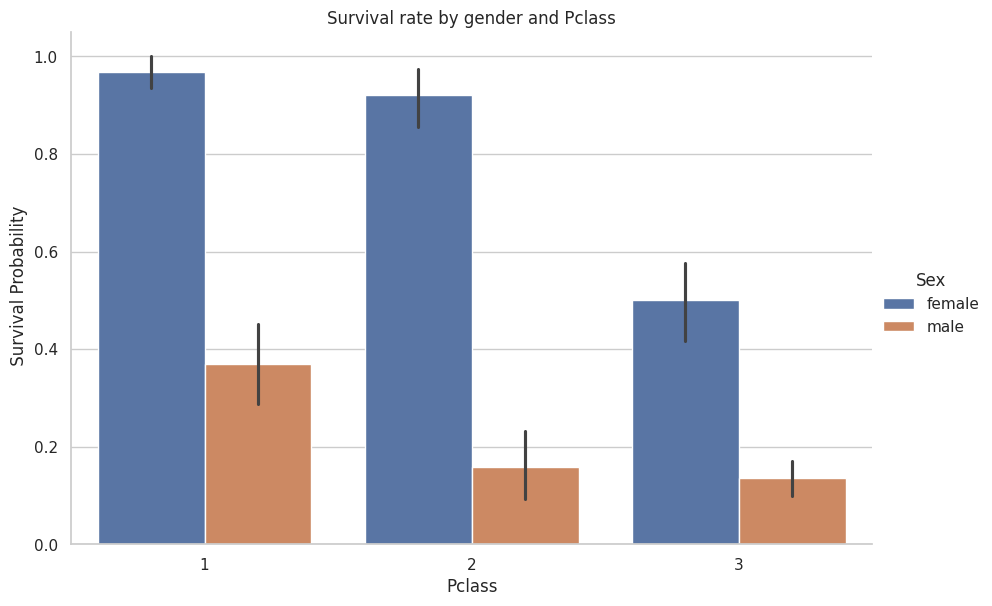

In [70]:
#Mutlivariate Analysis

sns.catplot(x='Pclass',y='Survived', hue='Sex',data=titanic_df,kind='bar',height=6, aspect=1.5)
plt.title('Survival rate by gender and Pclass')
plt.ylabel(' Survival Probability')
plt.show()

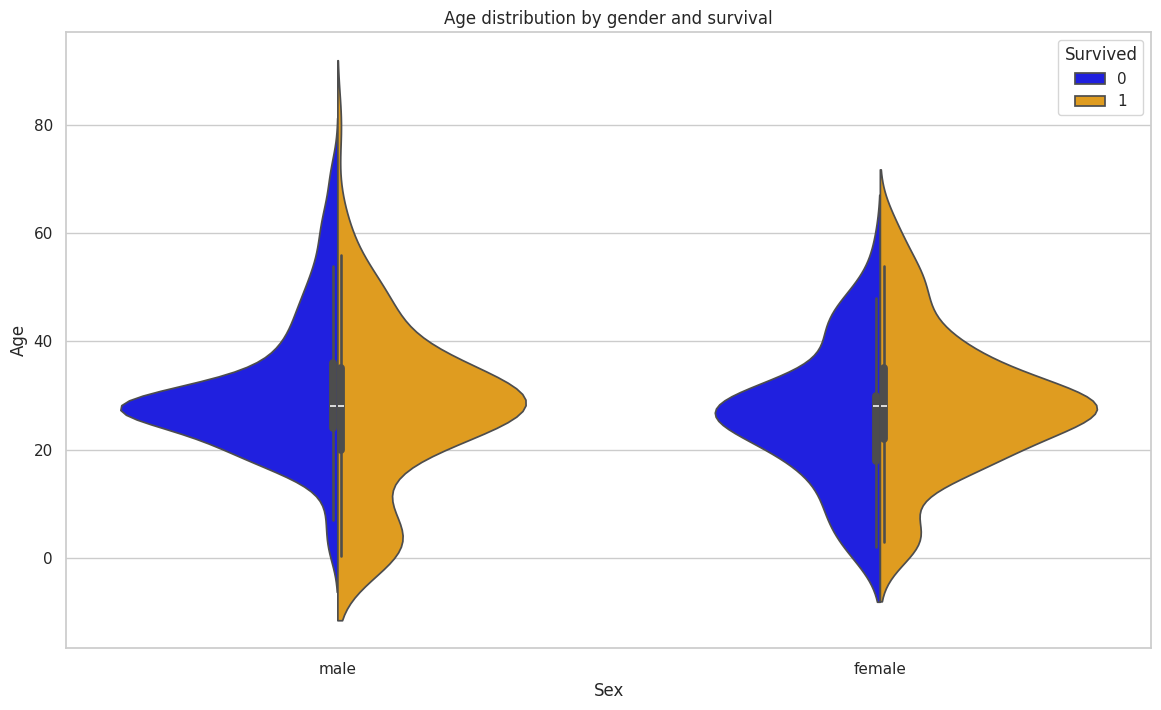

In [72]:
# violin plot

plt.figure(figsize=(14,8))
sns.violinplot(x='Sex',y='Age',hue='Survived',data=titanic_df,split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age distribution by gender and survival')
plt.ylabel('Age')
plt.show()

In [ ]:
# Correlation heatmap

